2.1 Train Cifar10 model on Architecture 1 
1. Train cifar10 on an architecture without regularization.
2. Add different regularizsers and train again.
3. Compare training and test set curves.

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l1, l2 , l1_l2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

X_Train:	 (50000, 32, 32, 3)
y_train:	 (50000, 1)
X_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)

Input Shape:	 (32, 32, 3)


In [ ]:
# Scaling

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

In [ ]:
def get_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [ ]:
# Hyperparameters

batch_size = 128
epochs = 100

In [ ]:
model_plain = get_model()

Model initialized. Please compile before training.


In [ ]:
model_plain.summary()
sgd_plain = keras.optimizers.SGD()
model_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_plain = model_plain.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [ ]:
print(history_model_plain.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


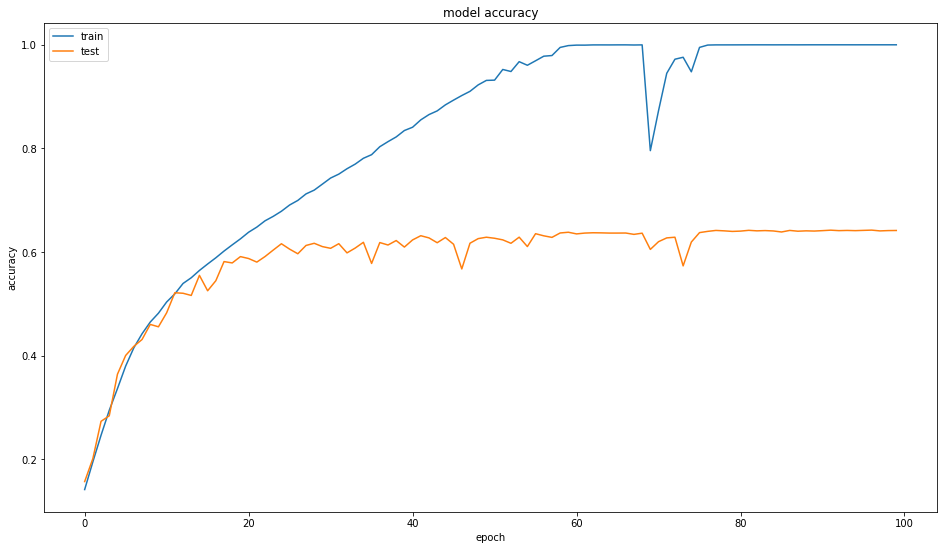

In [ ]:
# summarize history for accuracy
plt.plot(history_model_plain.history['accuracy'])
plt.plot(history_model_plain.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_plain.save('model_sgd_plain.h5')

L1 regularisation

In [ ]:
def get_l1_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [ ]:
model_l1 = get_l1_model()

Model initialized. Please compile before training.


In [29]:
model_l1.summary()
sgd_plain = keras.optimizers.SGD()
model_l1.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l1 = model_l1.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [30]:
print(history_model_l1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


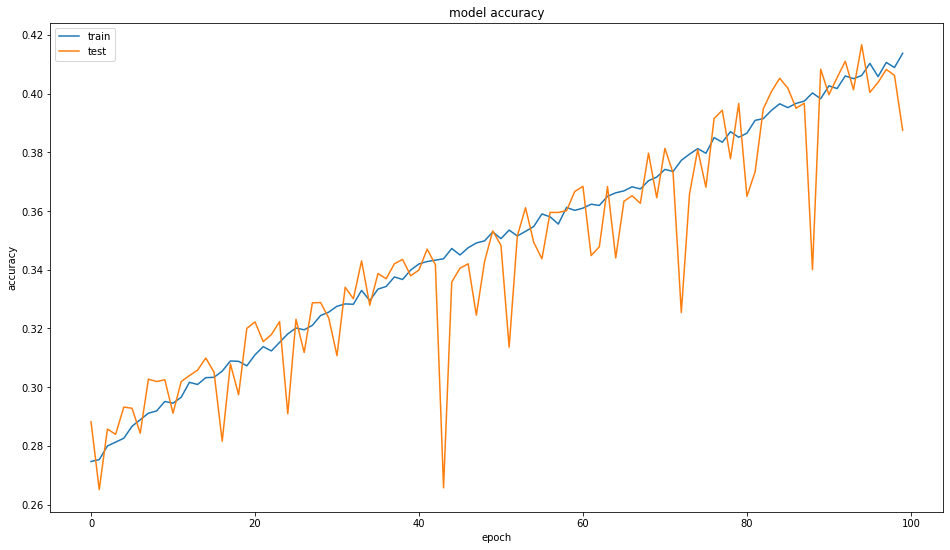

In [31]:
# summarize history for accuracy
plt.plot(history_model_l1.history['accuracy'])
plt.plot(history_model_l1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model_l1.save('model_l1.h5')

L2 regularizers. 

In [33]:
def get_l2_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [34]:
model_l2 = get_l2_model()

Model initialized. Please compile before training.


In [35]:
model_l2.summary()
sgd_plain = keras.optimizers.SGD()
model_l2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l2 = model_l2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [36]:
print(history_model_l2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


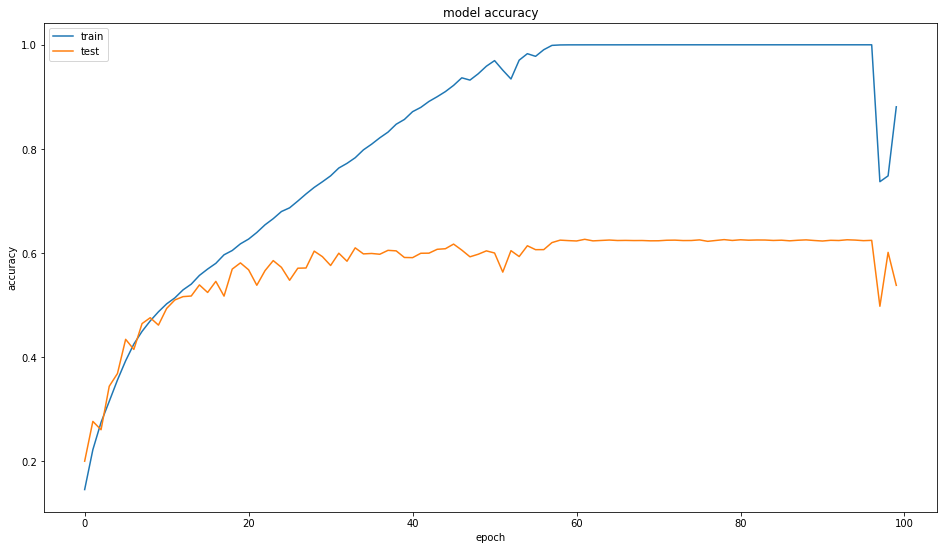

In [37]:
# summarize history for accuracy
plt.plot(history_model_l2.history['accuracy'])
plt.plot(history_model_l2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model_l2.save('model_l2.h5')

L1_L2 Regularizarion

In [39]:
def get_l1_l2_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [40]:
model_l1_l2 = get_l1_l2_model()

Model initialized. Please compile before training.


In [41]:
model_l1_l2.summary()
sgd_plain = keras.optimizers.SGD()
model_l1_l2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l1_l2 = model_l1_l2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [42]:
print(history_model_l1_l2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


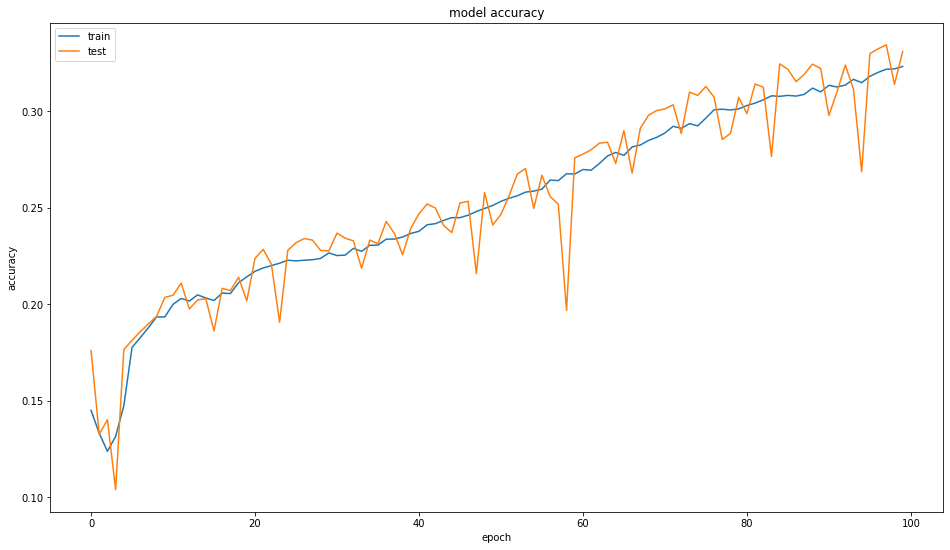

In [43]:
# summarize history for accuracy
plt.plot(history_model_l1_l2.history['accuracy'])
plt.plot(history_model_l1_l2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
model_l1_l2.save('model_l2.h5')

Dropout Regularization

In [45]:
def get_dropout_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [46]:
model_dropout = get_dropout_model()

Model initialized. Please compile before training.


In [47]:
model_dropout.summary()
sgd_plain = keras.optimizers.SGD()
model_dropout.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_dropout = model_dropout.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [48]:
print(history_model_dropout.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


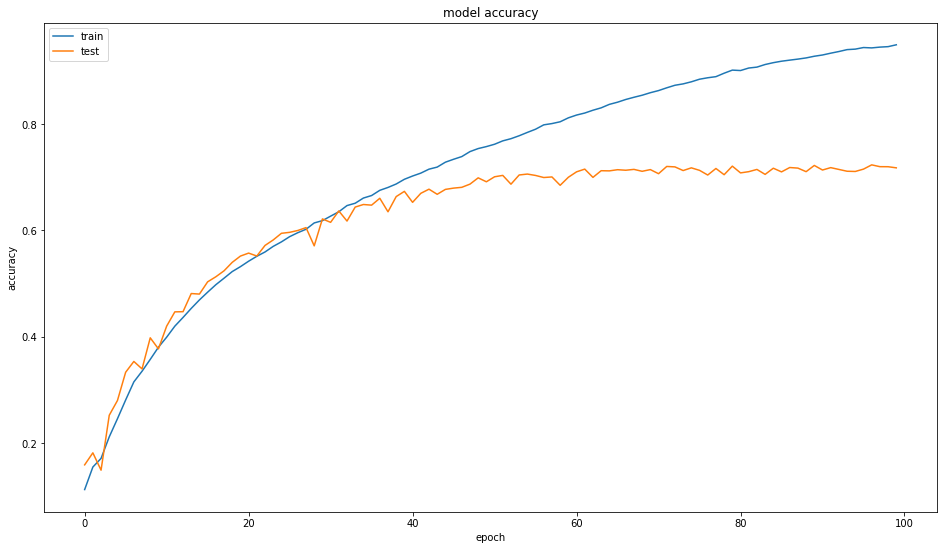

In [49]:
# summarize history for accuracy
plt.plot(history_model_dropout.history['accuracy'])
plt.plot(history_model_dropout.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2.2 Train Cifar10 model on Architecture 2 
1. Train cifar10 on an architecture without regularization.
2. Add different regularizsers and train again.
3. Compare training and test set curves.

In [53]:
def get_second_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [54]:
model_plain_second = get_second_model_architecture()

Model initialized. Please compile before training.


In [55]:
model_plain_second.summary()
sgd_plain = keras.optimizers.SGD()
model_plain_second.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_plain_second = model_plain_second.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

In [56]:
print(history_model_plain_second.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


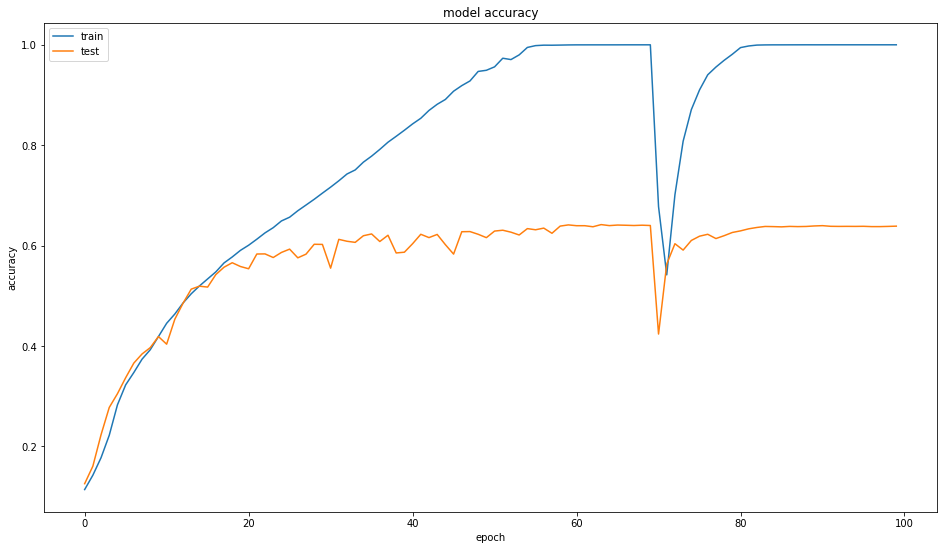

In [57]:
# summarize history for accuracy
plt.plot(history_model_plain_second.history['accuracy'])
plt.plot(history_model_plain_second.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
model_plain_second.save('model_sgd_plain_second.h5')

L1 regularization

In [59]:
def get_second_l1_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [60]:
model_l1_second = get_second_l1_model_architecture()

Model initialized. Please compile before training.


In [61]:
model_l1_second.summary()
sgd_plain = keras.optimizers.SGD()
model_l1_second.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l1_second = model_l1_second.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)             

In [62]:
print(history_model_l1_second.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


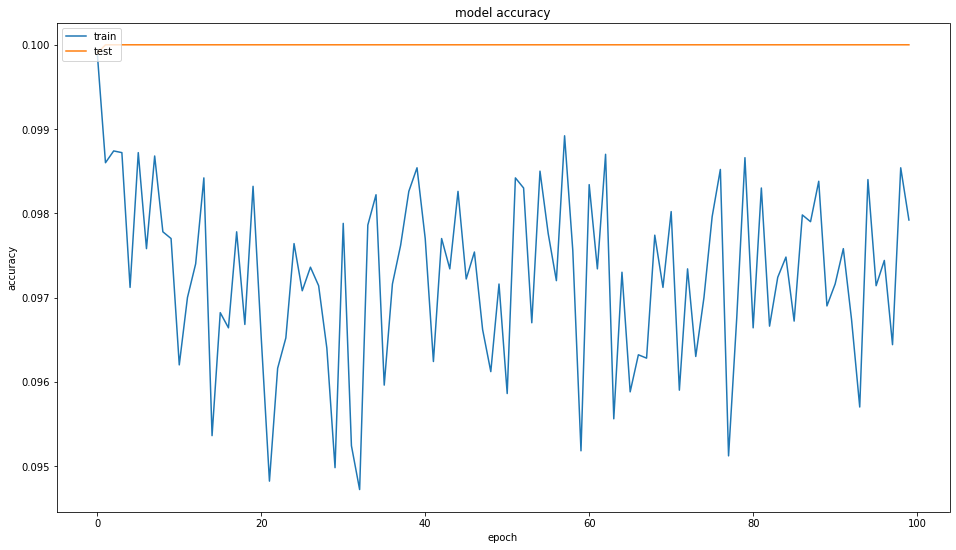

In [63]:
# summarize history for accuracy
plt.plot(history_model_l1_second.history['accuracy'])
plt.plot(history_model_l1_second.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
model_l1_second.save('model_l1_second.h5')

l2 Regularizer

In [65]:
def get_second_l2_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model


In [66]:
model_l2_second = get_second_l2_model_architecture()

Model initialized. Please compile before training.


In [67]:
model_l2_second.summary()
sgd_plain = keras.optimizers.SGD()
model_l2_second.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l2_second = model_l2_second.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)             

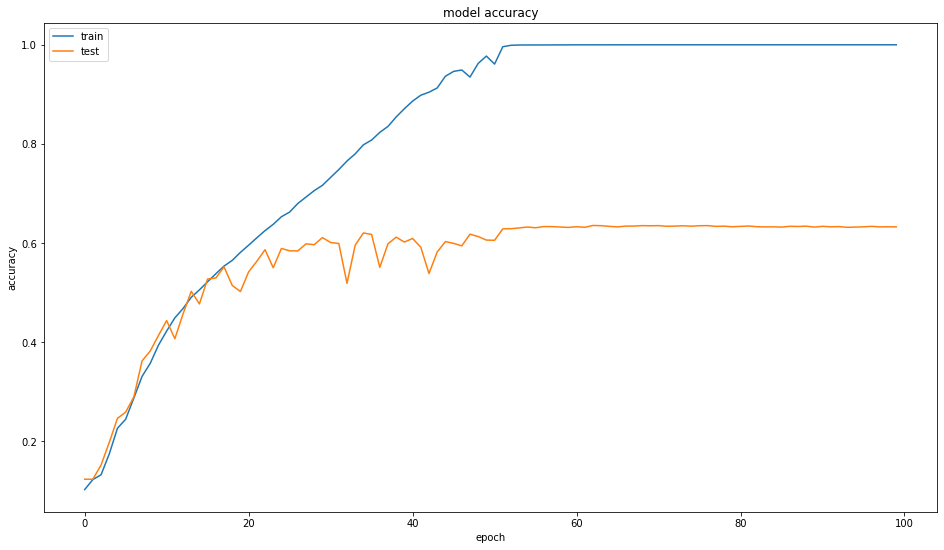

In [68]:
# summarize history for accuracy
plt.plot(history_model_l2_second.history['accuracy'])
plt.plot(history_model_l2_second.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

L1_L2 Regularization

In [69]:
def get_second_l1_l2_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
    model.add(Dense(units=512, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model


In [70]:
model_l1_l2_second = get_second_l1_l2_model_architecture()

Model initialized. Please compile before training.


In [71]:
model_l1_l2_second.summary()
sgd_plain = keras.optimizers.SGD()
model_l1_l2_second.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_l1_l2_second = model_l1_l2_second.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)            

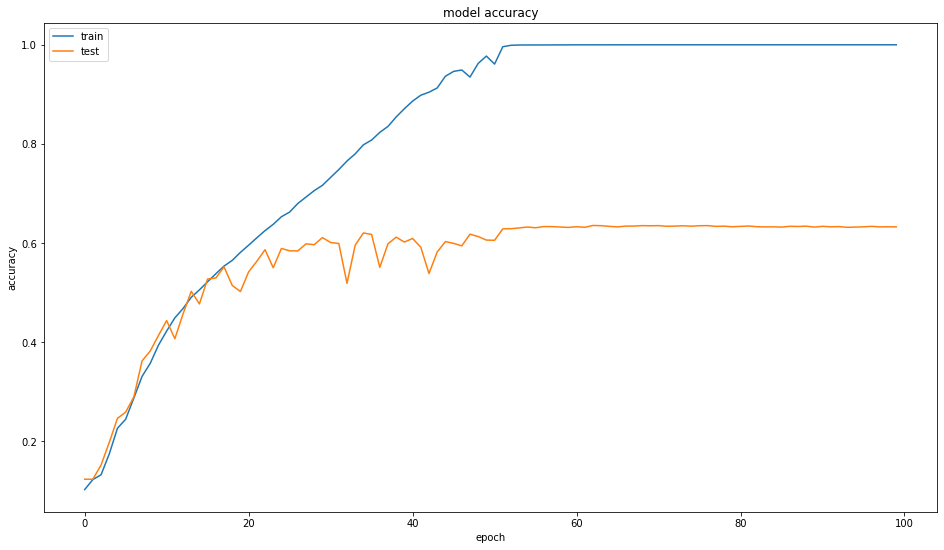

In [72]:
# summarize history for accuracy
plt.plot(history_model_l2_second.history['accuracy'])
plt.plot(history_model_l2_second.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dropout Regularization

In [73]:
def get_second_dropout_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [74]:
model_dropout_second = get_second_dropout_model_architecture()

Model initialized. Please compile before training.


In [75]:
model_dropout_second.summary()
sgd_plain = keras.optimizers.SGD()
model_dropout_second.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_model_dropout_second = model_dropout_second.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)            

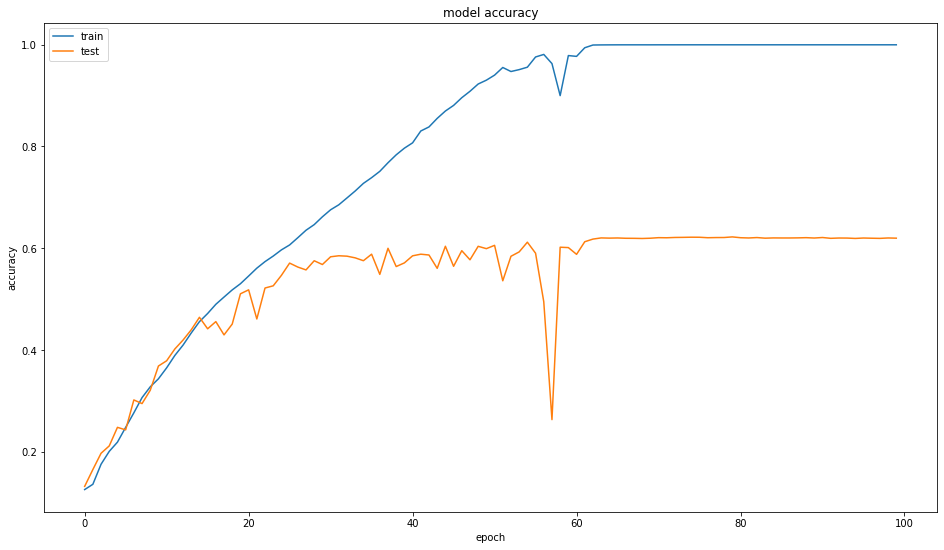

In [ ]:
# summarize history for accuracy
plt.plot(model_dropout_second.history['accuracy'])
plt.plot(model_dropout_second.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Regularizers and their purpose**

Regularizers are used to prevent overfitting problem and hence making models more generalized.



**L1 Regularization**
1.  The general intuition with L1 regularization is that, if a weight value is close to 0 or very small, then it’s negligible when it comes to the overall performance of the model, therefore making it 0 does not affect the model’s performance and can reduce the memory capacity of the model.
2.  L1 penalizes the sum of the absolute values of the weights (|weight|)

**L2 Regularization**

1.  L2 regularization also penalizes weight values. For both small weight values and relatively large ones, L2 regularization transforms the values to a number close to 0, but not quite 0.
2.  l2 penalizes the sum of the square of the weights (weight²).


**L1_L2 Regularization**

1. This is sum of L1 and L2 regularization

**Dropout Regularization**

1.  Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.


**Comparison of Regularization curves**

1.  **Training and test accuracy (or loss)-**

*   Without Regularization: The model is clearly overfitted as training accuracy is much higher than the test accuracy.
*   L1 Regularization: Both training and test accuracy dropped.
*   L2 Regularization: Training and test accuracy improved as compared to L1 regularization
*   L1_L2 Regularization: The accuracy of both training and test sets dropped but its better than only L1 regularization.
*   Dropout Regularization: The accuracy improved substantially.

2.  **Generalization error, i.e. the gap between train and test (including how strong the overfitting gets)-**
*   Without Regularization: The model is highly overfitted as there is huge gap between training and test curves.
*   L1 Regularization: The model generalizes but at the same time accuracy also decreased as compared to the model without regularization.
*   L2 Regularization: The gap between training and test set incresed but accuracy also increased as compared to L1 regularization.
*   L1_L2 Regularization: The gap between the training and test curves decreses but the accuracy is also decreased.
*   Dropout Regularization: The gap between training and test curves is less compared to the model without regularization and accuracy is also more. So, may be this is the best regularization methods.

3.  **Difference between when training has converged and at the sweet spot of generalization (smallest gap)-**
*   Without Regularization: After converging training set accuracy curve is not fluctuating but test set accuracy curve is fluctuating. 
*   L1 Regularization:  The training and test set accuracy curves fluctuate a lot.
*   L2 Regularization: Curves are stable after convergence but gap is more compared to L1.
*   L1_L2 Regularization: Test curve fluctuates but gap between them is less.
*   Dropout Regularization: The gap is not least but the curves are stable after convergence and accuracy is more compared to other regularization techniques.


**Comparison of different architectures**

The two architectures behaved differently when it comes to L1 regularization. In architecture 2 where we have more hidden layers on training set the model overfits may be bacause of too many hidden layers